[[  1.           5.           3.        ]
 [ 13.82684528  30.48365954   3.        ]
 [204.32958504 367.52301791   3.        ]
 ...
 [         nan          nan          nan]
 [         nan          nan          nan]
 [         nan          nan          nan]]


C:\Users\pmarg\AppData\Local\Temp\ipykernel_17096\2385393219.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dx = mu * x * y - Q * x
C:\Users\pmarg\AppData\Local\Temp\ipykernel_17096\2385393219.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dy = -mu * x * y + Q * (z - y)
C:\Users\pmarg\AppData\Local\Temp\ipykernel_17096\2385393219.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  dx = mu * x * y - Q * x
C:\Users\pmarg\AppData\Local\Temp\ipykernel_17096\2385393219.py:13: RuntimeWarning: invalid value encountered in scalar add
  dy = -mu * x * y + Q * (z - y)
C:\Users\pmarg\AppData\Local\Temp\ipykernel_17096\2385393219.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  dz = epsilon * Q * (y - z)


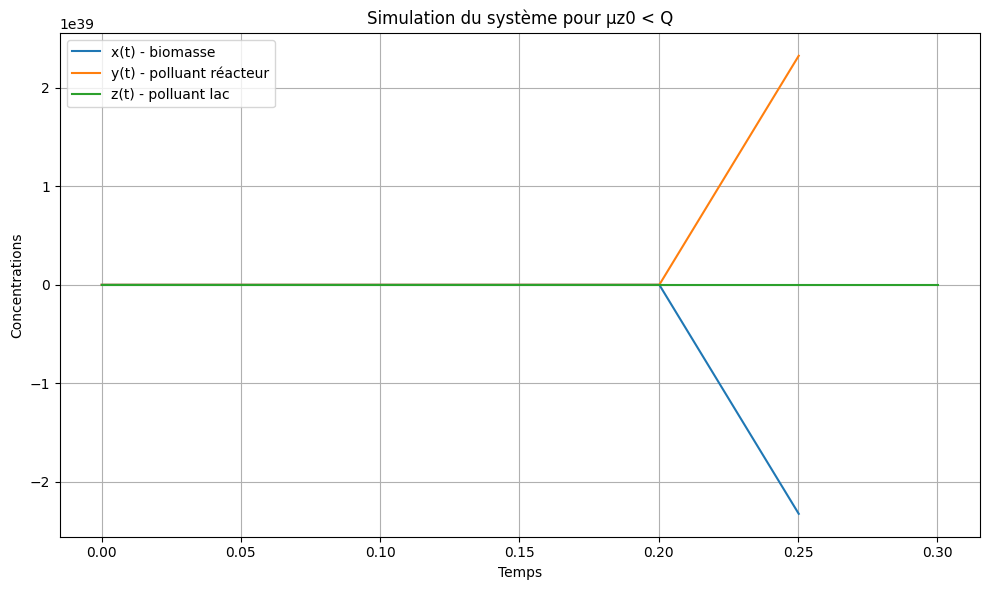

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# === Paramètres du modèle ===
mu = 0.01 # L/mg/jour
Q = 100 # en L/jour
epsilon = 0

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Implémentation de la méthode RK4 ===
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
        k4 = f(t[i] + dt, y[i] + dt * k3)
        y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# === Paramètres de simulation ===
t_max = 50
n_points = 1000
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 1.0  # biomasse initiale
y0 = 5.0   # concentration polluant dans le réacteur
z0 = 3.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)
print(solution)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µz0 < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


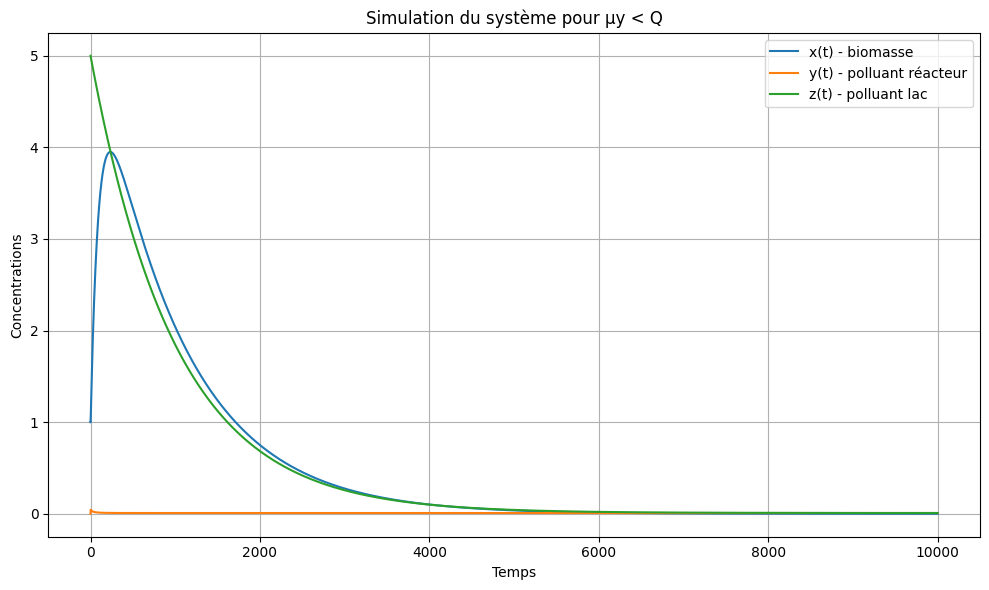

In [5]:
# === Paramètres du modèle ===
mu = 1.0
Q = 0.01
epsilon = 0.1

# === Paramètres de simulation ===
t_max = 10000
n_points = 100000
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 1.0   # biomasse initiale
y0 = 0.001  # concentration polluant dans le réacteur
z0 = 5.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Cas 1: asymptotiquement stable :
intuition initiale : Ca n'a pas d'interet car on est sur de converger vers un etat ou la biomasse est nulle a la fin. Mais, attention ca peut etre une phase transitoire interessante. On teste on voit que (faut s'assurer de l'echelle de temps) on converge vers le point d'equilibre mais tres lentement, la diminution de z n'est pas assez importante (pareil, faut avoir un seuil pour comparer) pour considerer que c'est une bonne phase transitoire. 
Remarque : On voit que z_lim est Q/mu. On peut de demander si on pourrait prendre des valeurs particulieres pour que la valeur limite soit proche de 0. (cf graphe 2). On remarque que ca prend enormement de temps. (logique car Q tres petit)

Ce qui conclut cette partie. 

Reflexion possible : voir quand ce scenario est utile, introduire un 'score' (temps de retour ... parametres, compromis ...)

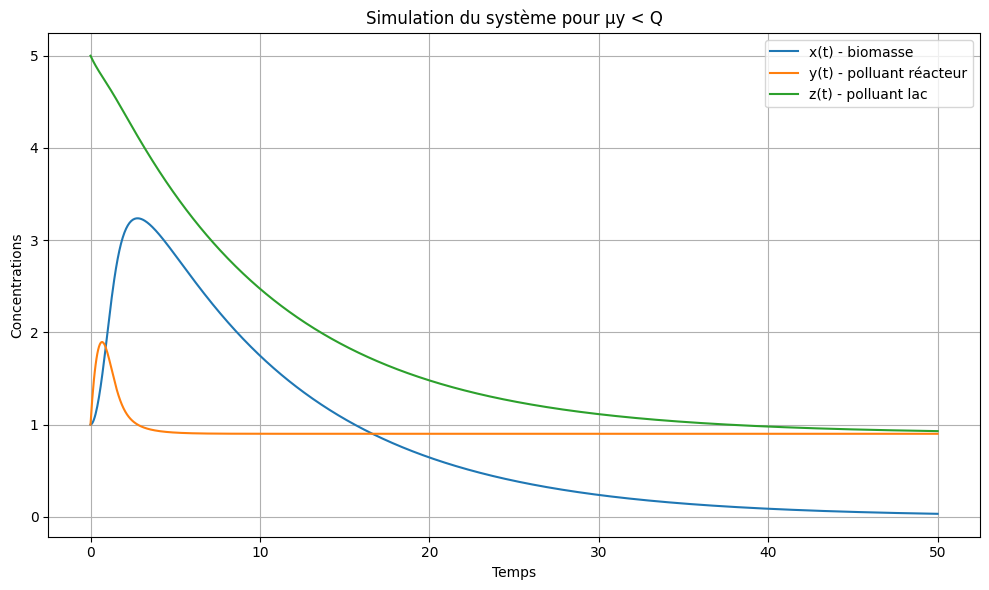

In [6]:
# === Paramètres du modèle ===
mu = 1.0
Q = 1.0
epsilon = 0.1

# === Paramètres de simulation ===
t_max = 50
n_points = 1000
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 1.0   # biomasse initiale
y0 = 1.0  # concentration polluant dans le réacteur
z0 = 5.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


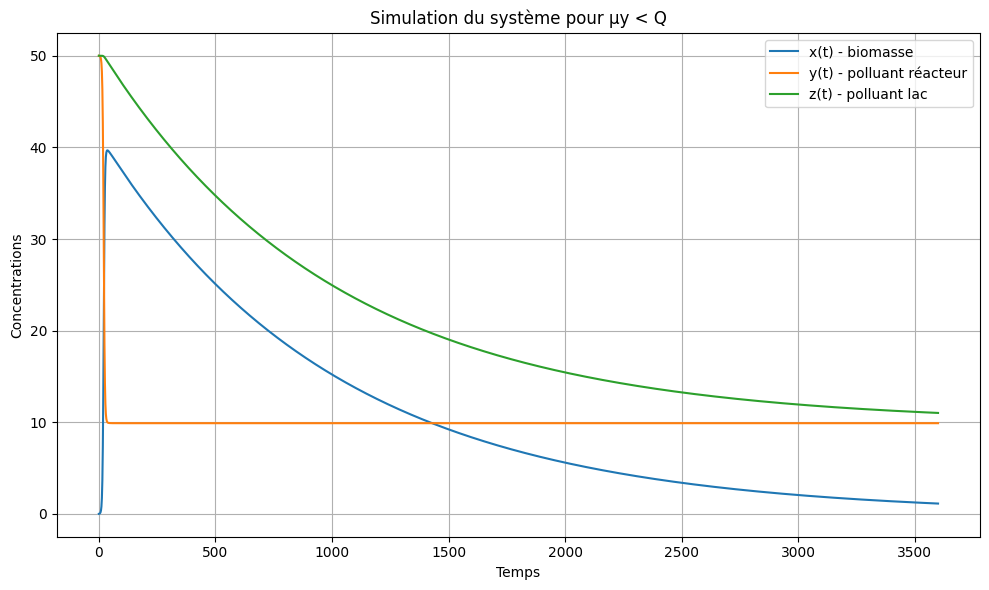

In [7]:
# === Paramètres du modèle ===
mu = 0.01
Q = 0.1
epsilon = 0.01

# === Paramètres de simulation ===
t_max = 3600
n_points = 3600
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 0.01   # biomasse initiale
y0 = 50.0  # concentration polluant dans le réacteur
z0 = 50.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy < Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


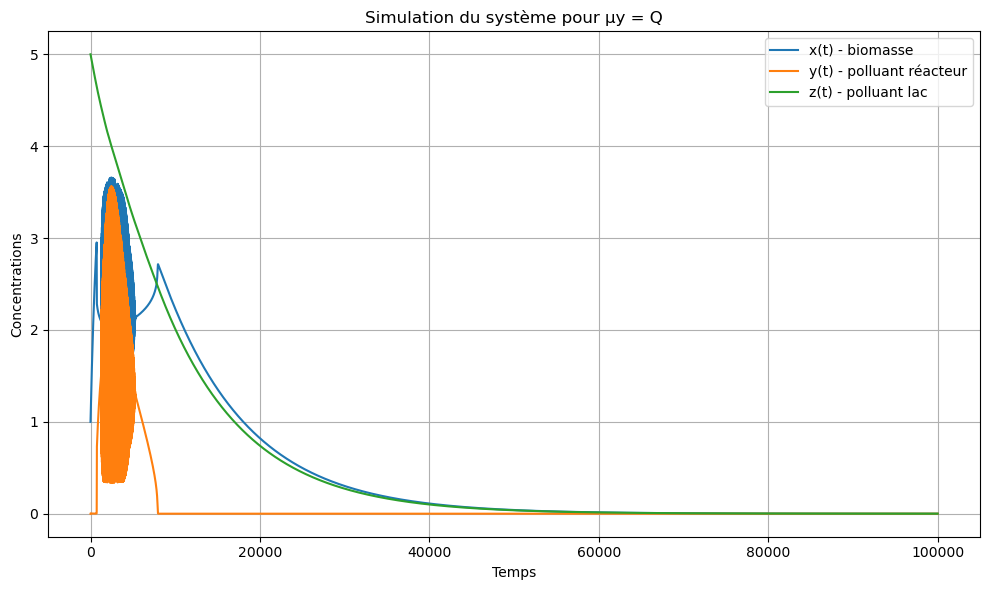

In [22]:
# === Paramètres du modèle ===
mu = 1.0
Q = 0.001
epsilon = 0.1

# === Paramètres de simulation ===
t_max = 100000
n_points = 100000
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 1.0   # biomasse initiale
y0 = 0.001  # concentration polluant dans le réacteur
z0 = 5.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy = Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Cas 2: mue * y = Q
Pratiquement, ce cas n'est pas tres interessant (egalite stricte, inatteignable en realite)
Par contre, c'est la transition entre deux regime differents d'ou son importance theorique.
On observe que ce regime est potentillement stable (voir asymptotiquement stable si possible, a revoir le cours et bien comprendre ces subtilites). pareil pour les cas Q/mue petit ...
(le 'bruit' --> instabilite numerique , pas assez de point, a voir si c'est important mais je ne pense pas)

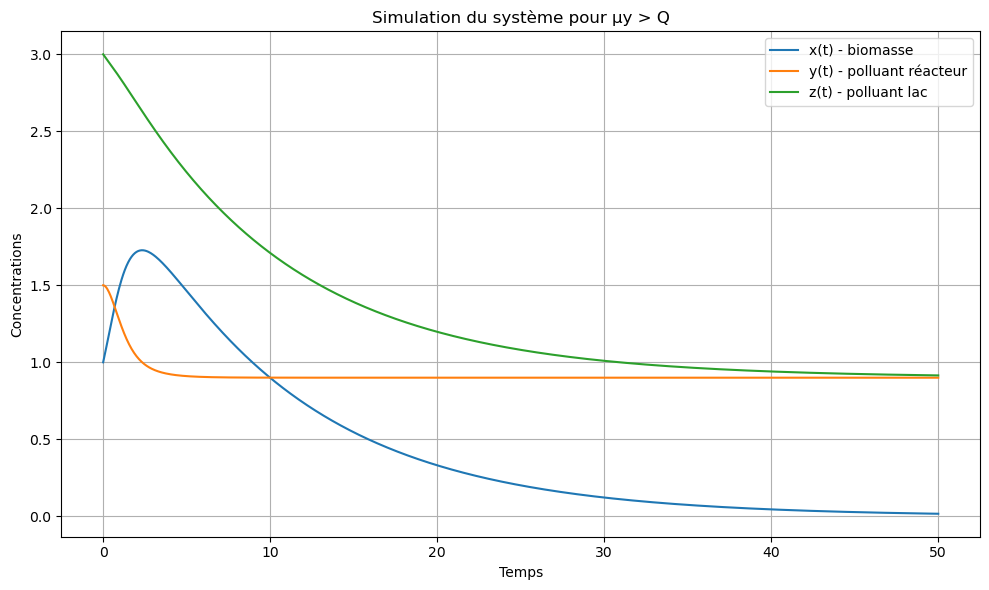

In [35]:
# === Paramètres du modèle ===
mu = 1.0
Q = 1.0
epsilon = 0.1

# === Paramètres de simulation ===
t_max = 50
n_points = 1000
t = np.linspace(0, t_max, n_points)

# === Conditions initiales ===
x0 = 1.0   # biomasse initiale
y0 = 1.5  # concentration polluant dans le réacteur
z0 = 3.0   # concentration dans le lac
initial_state = np.array([x0, y0, z0])

# === Simulation ===
solution = rk4(system, initial_state, t)

# === Tracé des résultats ===
plt.figure(figsize=(10, 6))
plt.plot(t, solution[:, 0], label='x(t) - biomasse')
plt.plot(t, solution[:, 1], label='y(t) - polluant réacteur')
plt.plot(t, solution[:, 2], label='z(t) - polluant lac')
plt.xlabel('Temps')
plt.ylabel('Concentrations')
plt.title('Simulation du système pour µy > Q')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Etape 1 : Visualisation 

a) des projections 2D et b) 3D

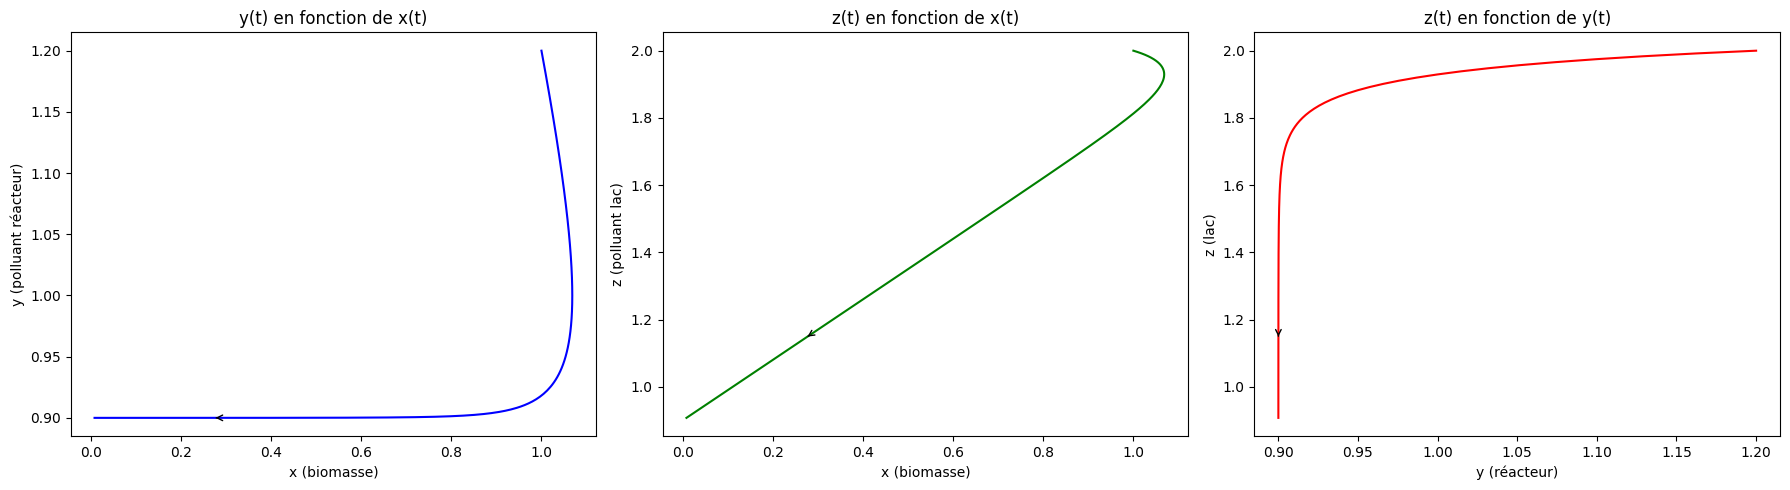

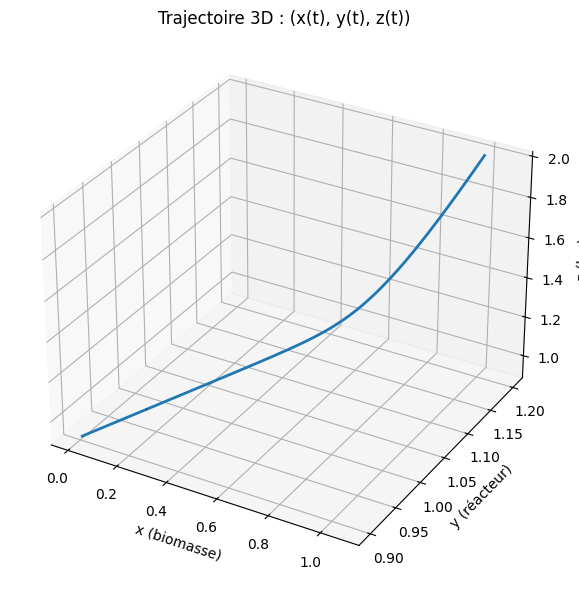

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres du système ===
mu = 1.0
Q = 1.0
epsilon = 0.1

# === Conditions initiales ===
x0 = 1.0
y0 = 1.2
z0 = 2.0
initial_state = np.array([x0, y0, z0])

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === RK4 ===
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
        k4 = f(t[i] + dt, y[i] + dt * k3)
        y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# === Simulation ===
t = np.linspace(0, 50, 1000)
solution = rk4(system, initial_state, t)
x, y, z = solution[:, 0], solution[:, 1], solution[:, 2]

# === Projections 2D avec flèche ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# y vs x
axes[0].plot(x, y, color='blue')
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (polluant réacteur)')
axes[0].set_title('y(t) en fonction de x(t)')
i = 300
axes[0].annotate('', xy=(x[i+1], y[i+1]), xytext=(x[i], y[i]),
                 arrowprops=dict(arrowstyle="->", color='black'))

# z vs x
axes[1].plot(x, z, color='green')
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (polluant lac)')
axes[1].set_title('z(t) en fonction de x(t)')
axes[1].annotate('', xy=(x[i+1], z[i+1]), xytext=(x[i], z[i]),
                 arrowprops=dict(arrowstyle="->", color='black'))

# z vs y
axes[2].plot(y, z, color='red')
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(t) en fonction de y(t)')
axes[2].annotate('', xy=(y[i+1], z[i+1]), xytext=(y[i], z[i]),
                 arrowprops=dict(arrowstyle="->", color='black'))

plt.tight_layout()
plt.show()

# === 3D Trajectory with arrow ===
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=2)
ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoire 3D : (x(t), y(t), z(t))')

# Ajout de la flèche 3D
dx = x[i+1] - x[i]
dy = y[i+1] - y[i]
dz = z[i+1] - z[i]
ax.quiver(x[i], y[i], z[i], dx, dy, dz, color='black', arrow_length_ratio=0.1)

plt.tight_layout()
plt.show()


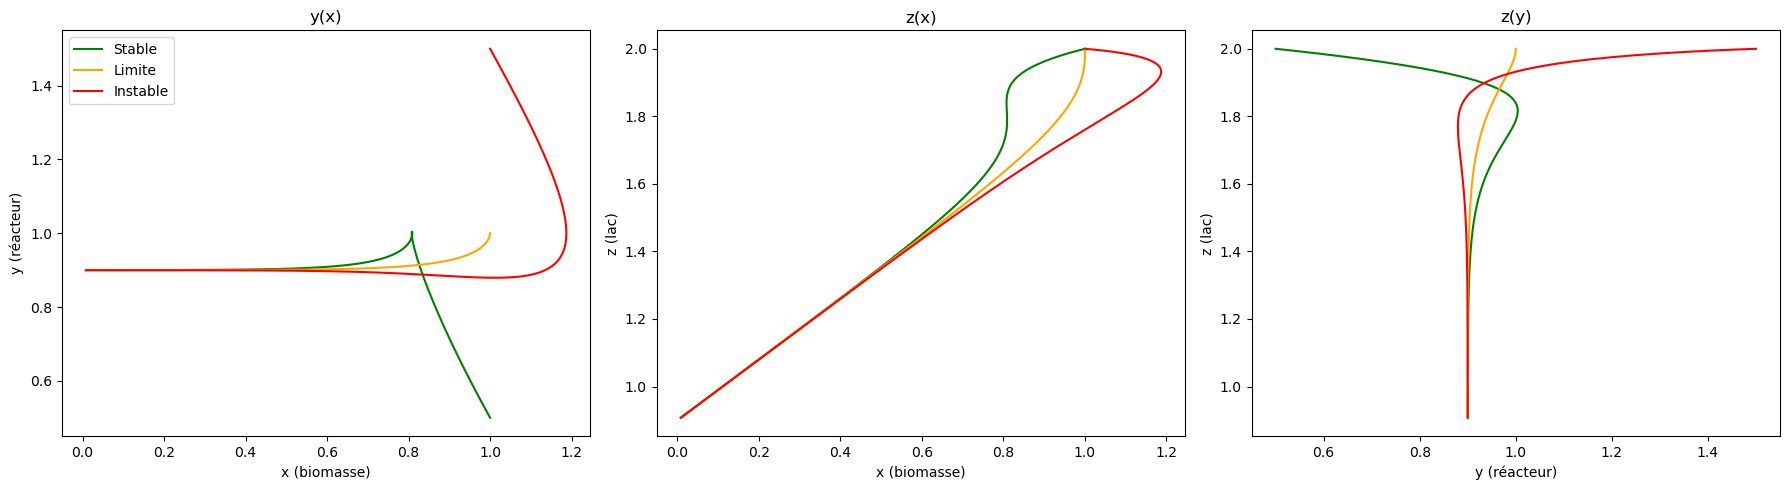

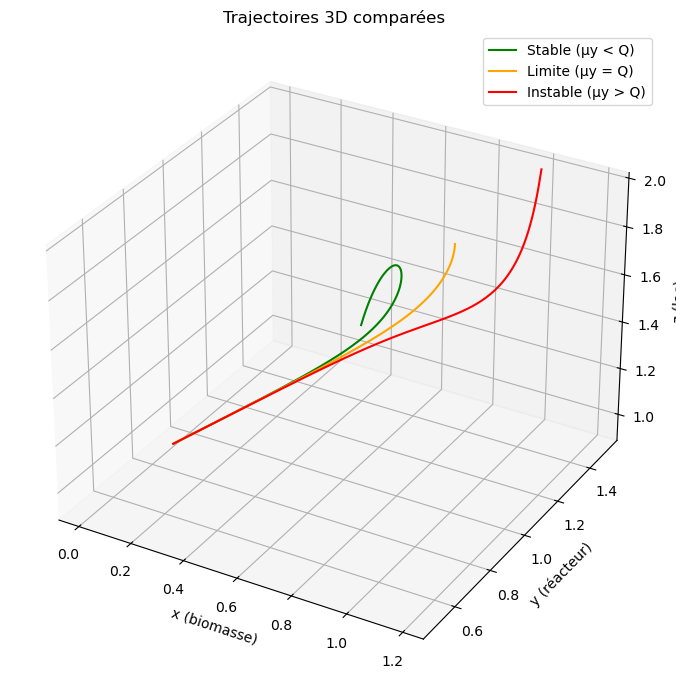

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres du système ===
mu = 1.0
Q = 1.0
epsilon = 0.1

# === Conditions initiales ===
init_stable = np.array([1.0, 0.5, 2.0])     # µy < Q
init_limite = np.array([1.0, 1.0, 2.0])     # µy = Q
init_instable = np.array([1.0, 1.5, 2.0])   # µy > Q

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === RK4 ===
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        dt = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
        k4 = f(t[i] + dt, y[i] + dt * k3)
        y[i+1] = y[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# === Simulation ===
t = np.linspace(0, 50, 1000)
sol_stable = rk4(system, init_stable, t)
sol_limite = rk4(system, init_limite, t)
sol_instable = rk4(system, init_instable, t)

# === Projections 2D ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# y vs x
axes[0].plot(sol_stable[:, 0], sol_stable[:, 1], color='green', label='Stable')
axes[0].plot(sol_limite[:, 0], sol_limite[:, 1], color='orange', label='Limite')
axes[0].plot(sol_instable[:, 0], sol_instable[:, 1], color='red', label='Instable')
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (réacteur)')
axes[0].set_title('y(x)')
axes[0].legend()

# z vs x
axes[1].plot(sol_stable[:, 0], sol_stable[:, 2], color='green')
axes[1].plot(sol_limite[:, 0], sol_limite[:, 2], color='orange')
axes[1].plot(sol_instable[:, 0], sol_instable[:, 2], color='red')
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (lac)')
axes[1].set_title('z(x)')

# z vs y
axes[2].plot(sol_stable[:, 1], sol_stable[:, 2], color='green')
axes[2].plot(sol_limite[:, 1], sol_limite[:, 2], color='orange')
axes[2].plot(sol_instable[:, 1], sol_instable[:, 2], color='red')
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(y)')

plt.tight_layout()
plt.show()

# === Trajectoire 3D comparative ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_stable[:, 0], sol_stable[:, 1], sol_stable[:, 2], label='Stable (µy < Q)', color='green')
ax.plot(sol_limite[:, 0], sol_limite[:, 1], sol_limite[:, 2], label='Limite (µy = Q)', color='orange')
ax.plot(sol_instable[:, 0], sol_instable[:, 1], sol_instable[:, 2], label='Instable (µy > Q)', color='red')
ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoires 3D comparées')
ax.legend()
plt.tight_layout()
plt.show()


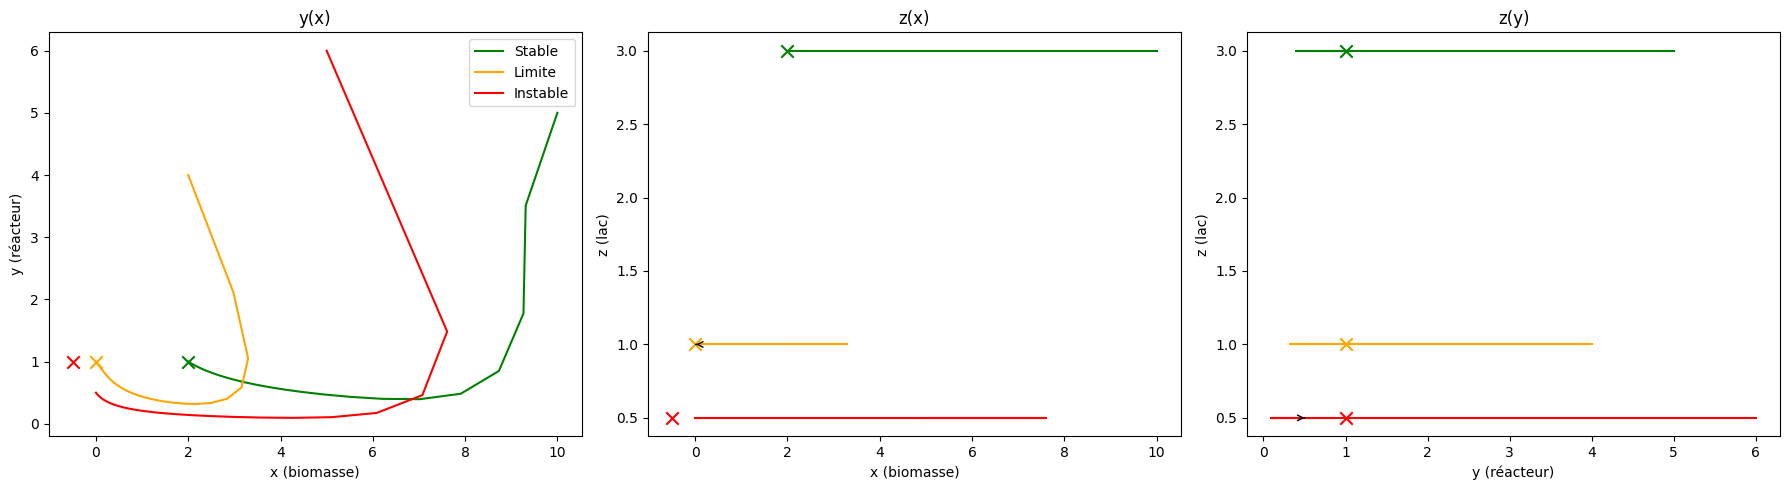

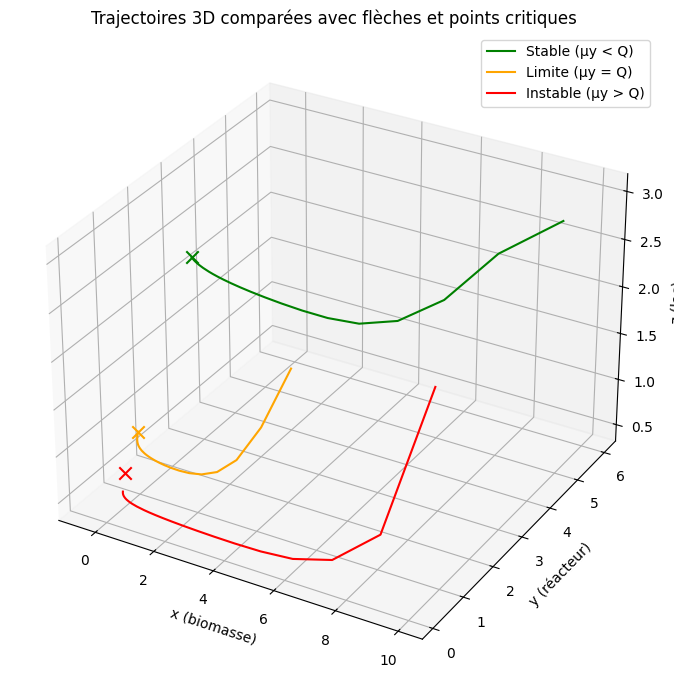

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0
nb_points = 1000
t = np.linspace(0, 200, nb_points)
dt = t[1] - t[0]

# === Conditions initiales ===
init_stable = np.array([10.0, 5.0, 3.0])     # µz > Q
init_limite = np.array([2, 4.0, 1.0])     # µz = Q
init_instable = np.array([5, 6.0, 0.5])   # µz < Q

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === RK4 ===
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

# === Simulation ===
sol_stable = rk4(system, init_stable, t)
sol_limite = rk4(system, init_limite, t)
sol_instable = rk4(system, init_instable, t)

# === Points critiques ===
def point_critique(mu, Q, z0):
    return (z0 - Q/mu, Q / mu, z0)

pt_stable = point_critique(mu, Q, init_stable[2])
pt_limite = point_critique(mu, Q, init_limite[2])
pt_instable = point_critique(mu, Q, init_instable[2])

i_arrow = 300  # index pour position de la flèche

# === Projections 2D ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# y vs x
axes[0].plot(sol_stable[:, 0], sol_stable[:, 1], color='green', label='Stable')
axes[0].plot(sol_limite[:, 0], sol_limite[:, 1], color='orange', label='Limite')
axes[0].plot(sol_instable[:, 0], sol_instable[:, 1], color='red', label='Instable')
axes[0].scatter(pt_stable[0], pt_stable[1], color='green', marker='x', s=80)
axes[0].scatter(pt_limite[0], pt_limite[1], color='orange', marker='x', s=80)
axes[0].scatter(pt_instable[0], pt_instable[1], color='red', marker='x', s=80)
axes[0].annotate('', xy=(sol_stable[i_arrow+1, 0], sol_stable[i_arrow+1, 1]),
                 xytext=(sol_stable[i_arrow, 0], sol_stable[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (réacteur)')
axes[0].set_title('y(x)')
axes[0].legend()

# z vs x
axes[1].plot(sol_stable[:, 0], sol_stable[:, 2], color='green')
axes[1].plot(sol_limite[:, 0], sol_limite[:, 2], color='orange')
axes[1].plot(sol_instable[:, 0], sol_instable[:, 2], color='red')
axes[1].scatter(pt_stable[0], pt_stable[2], color='green', marker='x', s=80)
axes[1].scatter(pt_limite[0], pt_limite[2], color='orange', marker='x', s=80)
axes[1].scatter(pt_instable[0], pt_instable[2], color='red', marker='x', s=80)
axes[1].annotate('', xy=(sol_limite[i_arrow+1, 0], sol_limite[i_arrow+1, 2]),
                 xytext=(sol_limite[i_arrow, 0], sol_limite[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (lac)')
axes[1].set_title('z(x)')

# z vs y
axes[2].plot(sol_stable[:, 1], sol_stable[:, 2], color='green')
axes[2].plot(sol_limite[:, 1], sol_limite[:, 2], color='orange')
axes[2].plot(sol_instable[:, 1], sol_instable[:, 2], color='red')
axes[2].scatter(pt_stable[1], pt_stable[2], color='green', marker='x', s=80)
axes[2].scatter(pt_limite[1], pt_limite[2], color='orange', marker='x', s=80)
axes[2].scatter(pt_instable[1], pt_instable[2], color='red', marker='x', s=80)
axes[2].annotate('', xy=(sol_instable[i_arrow+1, 1], sol_instable[i_arrow+1, 2]),
                 xytext=(sol_instable[i_arrow, 1], sol_instable[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(y)')

plt.tight_layout()
plt.show()

# === Trajectoire 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_stable[:, 0], sol_stable[:, 1], sol_stable[:, 2], label='Stable (µy < Q)', color='green')
ax.plot(sol_limite[:, 0], sol_limite[:, 1], sol_limite[:, 2], label='Limite (µy = Q)', color='orange')
ax.plot(sol_instable[:, 0], sol_instable[:, 1], sol_instable[:, 2], label='Instable (µy > Q)', color='red')

# Points critiques
ax.scatter(*pt_stable, color='green', marker='x', s=80)
ax.scatter(*pt_limite, color='orange', marker='x', s=80)
ax.scatter(*pt_instable, color='red', marker='x', s=80)

# Flèche 3D sur cas limite
dx = sol_limite[i_arrow+1, 0] - sol_limite[i_arrow, 0]
dy = sol_limite[i_arrow+1, 1] - sol_limite[i_arrow, 1]
dz = sol_limite[i_arrow+1, 2] - sol_limite[i_arrow, 2]
ax.quiver(sol_limite[i_arrow, 0], sol_limite[i_arrow, 1], sol_limite[i_arrow, 2],
          dx, dy, dz, color='black', arrow_length_ratio=0.1)

ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoires 3D comparées avec flèches et points critiques')
ax.legend()
plt.tight_layout()
plt.show()


Euler Explicite

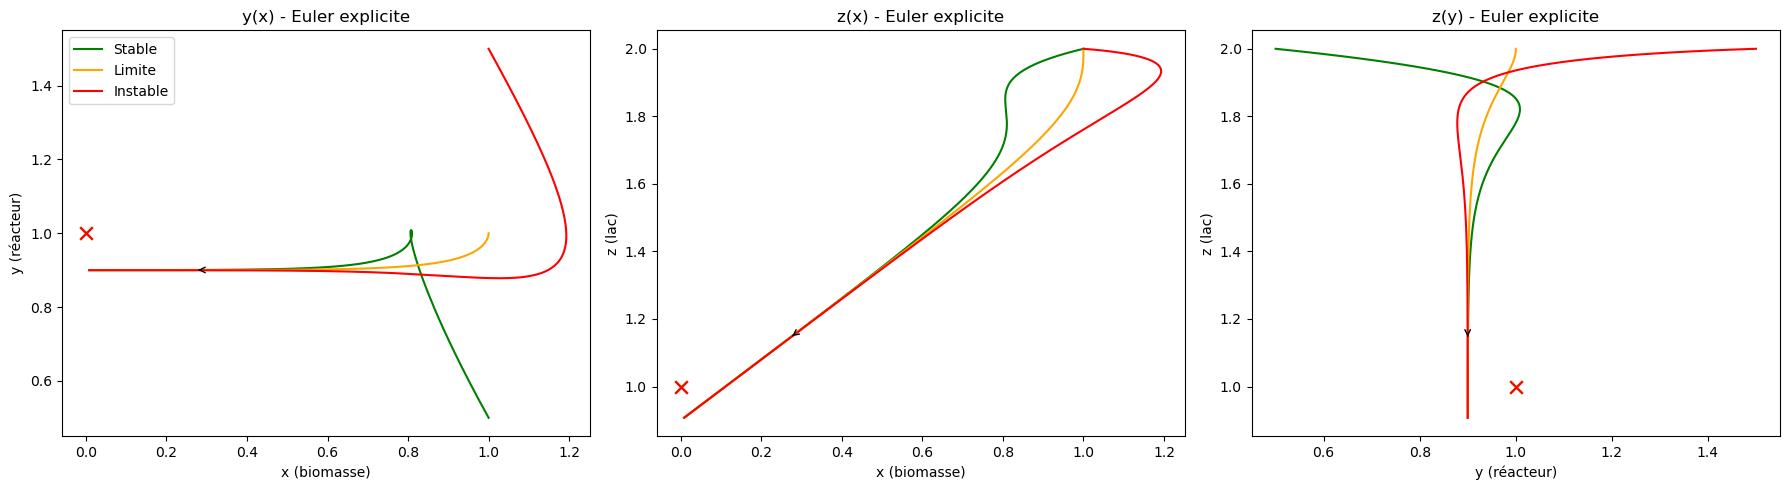

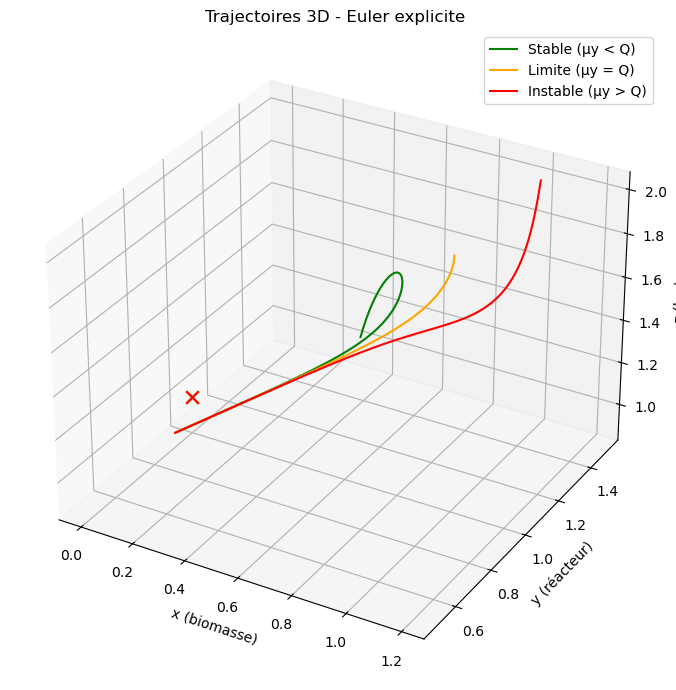

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0.1
t = np.linspace(0, 50, 1000)
dt = t[1] - t[0]

# === Conditions initiales ===
init_stable = np.array([1.0, 0.5, 2.0])     # µy < Q
init_limite = np.array([1.0, 1.0, 2.0])     # µy = Q
init_instable = np.array([1.0, 1.5, 2.0])   # µy > Q

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Euler explicite ===
def euler_explicit(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1] = y[i] + dt * f(t[i], y[i])
    return y

# === Points critiques ===
def point_critique(mu, Q):
    return (0, Q / mu, Q / mu)

pt_stable = point_critique(mu, Q)
pt_limite = point_critique(mu, Q)
pt_instable = point_critique(mu, Q)

# === Simulation Euler explicite ===
sol_stable = euler_explicit(system, init_stable, t)
sol_limite = euler_explicit(system, init_limite, t)
sol_instable = euler_explicit(system, init_instable, t)

# === Flèche directionnelle ===
i_arrow = 300

# === Projections 2D ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# y vs x
axes[0].plot(sol_stable[:, 0], sol_stable[:, 1], color='green', label='Stable')
axes[0].plot(sol_limite[:, 0], sol_limite[:, 1], color='orange', label='Limite')
axes[0].plot(sol_instable[:, 0], sol_instable[:, 1], color='red', label='Instable')
axes[0].scatter(0, pt_stable[1], color='green', marker='x', s=80)
axes[0].scatter(0, pt_limite[1], color='orange', marker='x', s=80)
axes[0].scatter(0, pt_instable[1], color='red', marker='x', s=80)
axes[0].annotate('', xy=(sol_stable[i_arrow+1, 0], sol_stable[i_arrow+1, 1]),
                 xytext=(sol_stable[i_arrow, 0], sol_stable[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (réacteur)')
axes[0].set_title('y(x) - Euler explicite')
axes[0].legend()

# z vs x
axes[1].plot(sol_stable[:, 0], sol_stable[:, 2], color='green')
axes[1].plot(sol_limite[:, 0], sol_limite[:, 2], color='orange')
axes[1].plot(sol_instable[:, 0], sol_instable[:, 2], color='red')
axes[1].scatter(0, pt_stable[2], color='green', marker='x', s=80)
axes[1].scatter(0, pt_limite[2], color='orange', marker='x', s=80)
axes[1].scatter(0, pt_instable[2], color='red', marker='x', s=80)
axes[1].annotate('', xy=(sol_limite[i_arrow+1, 0], sol_limite[i_arrow+1, 2]),
                 xytext=(sol_limite[i_arrow, 0], sol_limite[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (lac)')
axes[1].set_title('z(x) - Euler explicite')

# z vs y
axes[2].plot(sol_stable[:, 1], sol_stable[:, 2], color='green')
axes[2].plot(sol_limite[:, 1], sol_limite[:, 2], color='orange')
axes[2].plot(sol_instable[:, 1], sol_instable[:, 2], color='red')
axes[2].scatter(pt_stable[1], pt_stable[2], color='green', marker='x', s=80)
axes[2].scatter(pt_limite[1], pt_limite[2], color='orange', marker='x', s=80)
axes[2].scatter(pt_instable[1], pt_instable[2], color='red', marker='x', s=80)
axes[2].annotate('', xy=(sol_instable[i_arrow+1, 1], sol_instable[i_arrow+1, 2]),
                 xytext=(sol_instable[i_arrow, 1], sol_instable[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(y) - Euler explicite')

plt.tight_layout()
plt.show()

# === Trajectoire 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_stable[:, 0], sol_stable[:, 1], sol_stable[:, 2], label='Stable (µy < Q)', color='green')
ax.plot(sol_limite[:, 0], sol_limite[:, 1], sol_limite[:, 2], label='Limite (µy = Q)', color='orange')
ax.plot(sol_instable[:, 0], sol_instable[:, 1], sol_instable[:, 2], label='Instable (µy > Q)', color='red')
ax.scatter(*pt_stable, color='green', marker='x', s=80)
ax.scatter(*pt_limite, color='orange', marker='x', s=80)
ax.scatter(*pt_instable, color='red', marker='x', s=80)

# Flèche 3D sur cas limite
dx = sol_limite[i_arrow+1, 0] - sol_limite[i_arrow, 0]
dy = sol_limite[i_arrow+1, 1] - sol_limite[i_arrow, 1]
dz = sol_limite[i_arrow+1, 2] - sol_limite[i_arrow, 2]
ax.quiver(sol_limite[i_arrow, 0], sol_limite[i_arrow, 1], sol_limite[i_arrow, 2],
          dx, dy, dz, color='black', arrow_length_ratio=0.1)

ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoires 3D - Euler explicite')
ax.legend()
plt.tight_layout()
plt.show()


Euler implicite

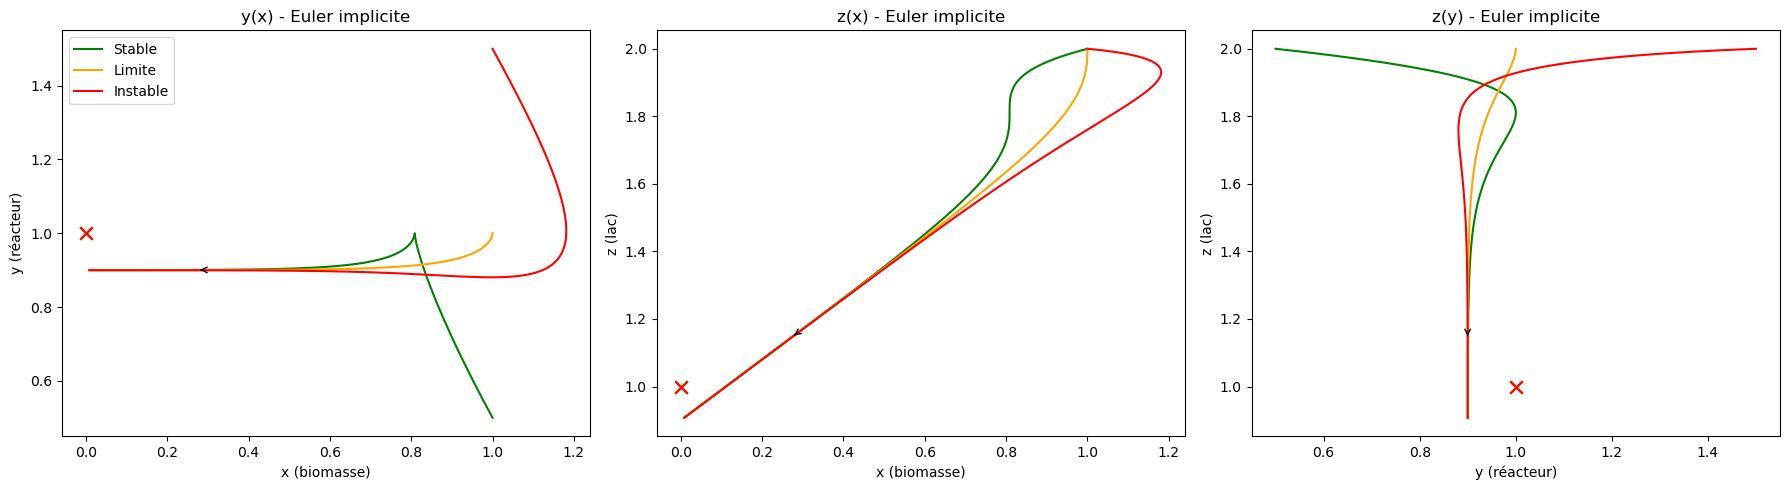

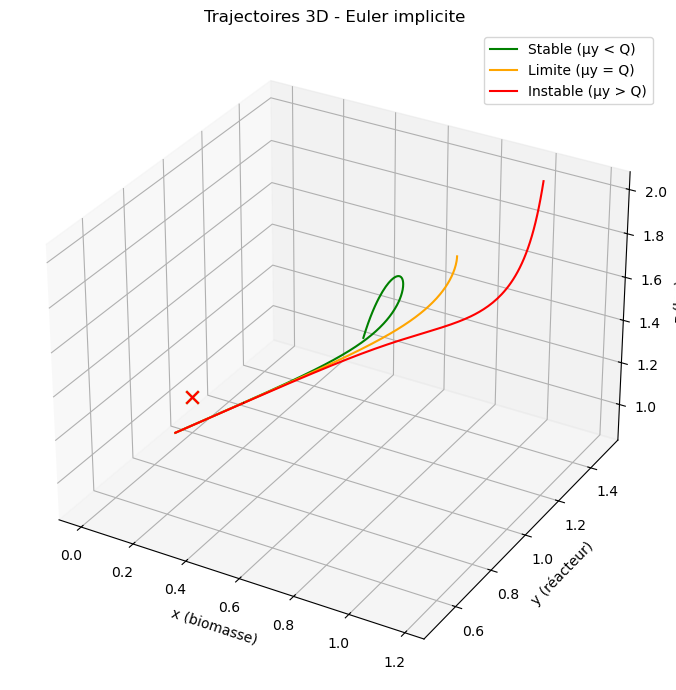

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0.1
t = np.linspace(0, 50, 1000)
dt = t[1] - t[0]

# === Conditions initiales ===
init_stable = np.array([1.0, 0.5, 2.0])     # µy < Q
init_limite = np.array([1.0, 1.0, 2.0])     # µy = Q
init_instable = np.array([1.0, 1.5, 2.0])   # µy > Q

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Euler implicite (point fixe) ===
def euler_implicit(f, y0, t, max_iter=10, tol=1e-6):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        yn1 = yn.copy()
        for _ in range(max_iter):
            yn1_new = yn + dt * f(t[i+1], yn1)
            if np.linalg.norm(yn1_new - yn1) < tol:
                break
            yn1 = yn1_new
        y[i+1] = yn1
    return y

# === Points critiques ===
def point_critique(mu, Q):
    return (0, Q / mu, Q / mu)

pt_stable = point_critique(mu, Q)
pt_limite = point_critique(mu, Q)
pt_instable = point_critique(mu, Q)

# === Simulation ===
sol_stable = euler_implicit(system, init_stable, t)
sol_limite = euler_implicit(system, init_limite, t)
sol_instable = euler_implicit(system, init_instable, t)

# === Flèche directionnelle ===
i_arrow = 300

# === Projections 2D ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# y vs x
axes[0].plot(sol_stable[:, 0], sol_stable[:, 1], color='green', label='Stable')
axes[0].plot(sol_limite[:, 0], sol_limite[:, 1], color='orange', label='Limite')
axes[0].plot(sol_instable[:, 0], sol_instable[:, 1], color='red', label='Instable')
axes[0].scatter(0, pt_stable[1], color='green', marker='x', s=80)
axes[0].scatter(0, pt_limite[1], color='orange', marker='x', s=80)
axes[0].scatter(0, pt_instable[1], color='red', marker='x', s=80)
axes[0].annotate('', xy=(sol_stable[i_arrow+1, 0], sol_stable[i_arrow+1, 1]),
                 xytext=(sol_stable[i_arrow, 0], sol_stable[i_arrow, 1]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[0].set_xlabel('x (biomasse)')
axes[0].set_ylabel('y (réacteur)')
axes[0].set_title('y(x) - Euler implicite')
axes[0].legend()

# z vs x
axes[1].plot(sol_stable[:, 0], sol_stable[:, 2], color='green')
axes[1].plot(sol_limite[:, 0], sol_limite[:, 2], color='orange')
axes[1].plot(sol_instable[:, 0], sol_instable[:, 2], color='red')
axes[1].scatter(0, pt_stable[2], color='green', marker='x', s=80)
axes[1].scatter(0, pt_limite[2], color='orange', marker='x', s=80)
axes[1].scatter(0, pt_instable[2], color='red', marker='x', s=80)
axes[1].annotate('', xy=(sol_limite[i_arrow+1, 0], sol_limite[i_arrow+1, 2]),
                 xytext=(sol_limite[i_arrow, 0], sol_limite[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[1].set_xlabel('x (biomasse)')
axes[1].set_ylabel('z (lac)')
axes[1].set_title('z(x) - Euler implicite')

# z vs y
axes[2].plot(sol_stable[:, 1], sol_stable[:, 2], color='green')
axes[2].plot(sol_limite[:, 1], sol_limite[:, 2], color='orange')
axes[2].plot(sol_instable[:, 1], sol_instable[:, 2], color='red')
axes[2].scatter(pt_stable[1], pt_stable[2], color='green', marker='x', s=80)
axes[2].scatter(pt_limite[1], pt_limite[2], color='orange', marker='x', s=80)
axes[2].scatter(pt_instable[1], pt_instable[2], color='red', marker='x', s=80)
axes[2].annotate('', xy=(sol_instable[i_arrow+1, 1], sol_instable[i_arrow+1, 2]),
                 xytext=(sol_instable[i_arrow, 1], sol_instable[i_arrow, 2]),
                 arrowprops=dict(arrowstyle="->", color='black'))
axes[2].set_xlabel('y (réacteur)')
axes[2].set_ylabel('z (lac)')
axes[2].set_title('z(y) - Euler implicite')

plt.tight_layout()
plt.show()

# === Trajectoire 3D ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol_stable[:, 0], sol_stable[:, 1], sol_stable[:, 2], label='Stable (µy < Q)', color='green')
ax.plot(sol_limite[:, 0], sol_limite[:, 1], sol_limite[:, 2], label='Limite (µy = Q)', color='orange')
ax.plot(sol_instable[:, 0], sol_instable[:, 1], sol_instable[:, 2], label='Instable (µy > Q)', color='red')
ax.scatter(*pt_stable, color='green', marker='x', s=80)
ax.scatter(*pt_limite, color='orange', marker='x', s=80)
ax.scatter(*pt_instable, color='red', marker='x', s=80)

# Flèche 3D
dx = sol_limite[i_arrow+1, 0] - sol_limite[i_arrow, 0]
dy = sol_limite[i_arrow+1, 1] - sol_limite[i_arrow, 1]
dz = sol_limite[i_arrow+1, 2] - sol_limite[i_arrow, 2]
ax.quiver(sol_limite[i_arrow, 0], sol_limite[i_arrow, 1], sol_limite[i_arrow, 2],
          dx, dy, dz, color='black', arrow_length_ratio=0.1)

ax.set_xlabel('x (biomasse)')
ax.set_ylabel('y (réacteur)')
ax.set_zlabel('z (lac)')
ax.set_title('Trajectoires 3D - Euler implicite')
ax.legend()
plt.tight_layout()
plt.show()


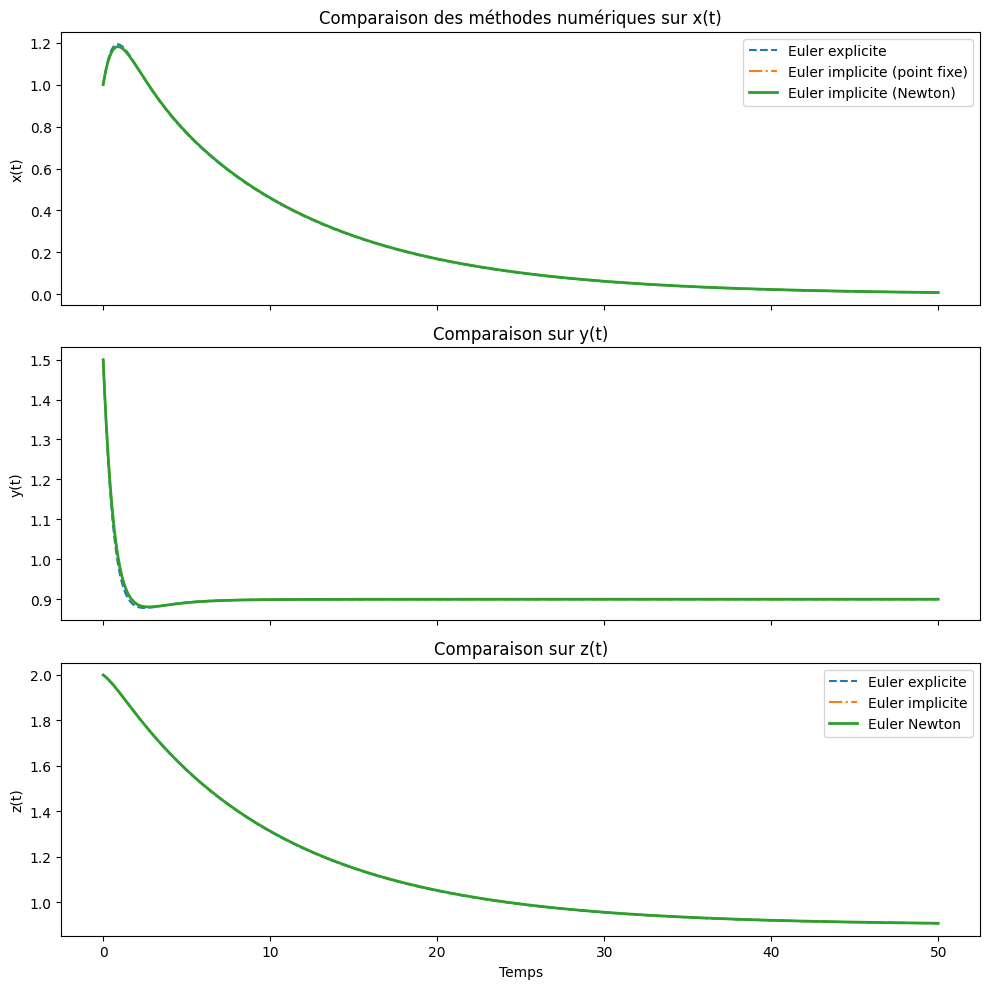

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# === Paramètres ===
mu = 1.0
Q = 1.0
epsilon = 0.1
t = np.linspace(0, 50, 1000)
dt = t[1] - t[0]

# === Conditions initiales (cas instable) ===
init_instable = np.array([1.0, 1.5, 2.0])

# === Système différentiel ===
def system(t, state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

# === Euler explicite ===
def euler_explicit(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1] = y[i] + dt * f(t[i], y[i])
    return y

# === Euler implicite (point fixe) ===
def euler_implicit(f, y0, t, max_iter=10, tol=1e-6):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        yn1 = yn.copy()
        for _ in range(max_iter):
            yn1_new = yn + dt * f(t[i+1], yn1)
            if np.linalg.norm(yn1_new - yn1) < tol:
                break
            yn1 = yn1_new
        y[i+1] = yn1
    return y

# === Euler implicite avec Newton-Raphson ===
def f_system(state):
    x, y, z = state
    dx = mu * x * y - Q * x
    dy = -mu * x * y + Q * (z - y)
    dz = epsilon * Q * (y - z)
    return np.array([dx, dy, dz])

def jacobian(state):
    x, y, z = state
    return np.array([
        [mu * y - Q, mu * x, 0],
        [-mu * y, -mu * x - Q, Q],
        [0, epsilon * Q, -epsilon * Q]
    ])

def euler_implicit_newton(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        yn = y[i]
        def g(y_next):
            return y_next - yn - dt * f(y_next)
        def J(y_next):
            return np.eye(3) - dt * jacobian(y_next)
        sol = root(g, yn, jac=J, method='hybr')
        y[i+1] = sol.x
    return y

# === Simulation des 3 méthodes ===
sol_explicit = euler_explicit(system, init_instable, t)
sol_implicit = euler_implicit(system, init_instable, t)
sol_newton = euler_implicit_newton(f_system, init_instable, t)

# === Tracé comparatif ===
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# x(t)
axes[0].plot(t, sol_explicit[:, 0], label="Euler explicite", linestyle='--')
axes[0].plot(t, sol_implicit[:, 0], label="Euler implicite (point fixe)", linestyle='-.')
axes[0].plot(t, sol_newton[:, 0], label="Euler implicite (Newton)", linewidth=2)
axes[0].set_ylabel('x(t)')
axes[0].legend()
axes[0].set_title('Comparaison des méthodes numériques sur x(t)')

# y(t)
axes[1].plot(t, sol_explicit[:, 1], linestyle='--')
axes[1].plot(t, sol_implicit[:, 1], linestyle='-.')
axes[1].plot(t, sol_newton[:, 1], linewidth=2)
axes[1].set_ylabel('y(t)')
axes[1].set_title('Comparaison sur y(t)')

# z(t)
axes[2].plot(t, sol_explicit[:, 2], linestyle='--', label="Euler explicite")
axes[2].plot(t, sol_implicit[:, 2], linestyle='-.', label="Euler implicite")
axes[2].plot(t, sol_newton[:, 2], linewidth=2, label="Euler Newton")
axes[2].set_xlabel('Temps')
axes[2].set_ylabel('z(t)')
axes[2].set_title('Comparaison sur z(t)')
axes[2].legend()

plt.tight_layout()
plt.show()
